<a href="https://colab.research.google.com/github/jithamanyu001/CV/blob/main/Autoencoder_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

In [62]:
(X_train,Y_train),(X_test,Y_test)=load_data()

In [63]:
train=X_train[:1000]
test=X_test[:10]

In [53]:
i=tf.keras.layers.Input(shape=train[0].shape + (1,))
x=tf.keras.layers.Conv2D(8,3,2,activation='relu')(i)
x=tf.keras.layers.Conv2D(16,3,2,activation='relu')(x)
x=tf.keras.layers.Conv2D(32,3,2,activation='relu')(x)
x=tf.keras.layers.Conv2D(62,2,activation='relu')(x)
x=tf.keras.layers.Conv2DTranspose(8,5,2,activation='relu')(x)
x=tf.keras.layers.Conv2DTranspose(16,5,2,activation='relu')(x)
x=tf.keras.layers.Conv2DTranspose(1,4,2,activation='relu')(x)

autoencoder=tf.keras.models.Model(i,x)
autoencoder.summary()


Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_59 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_111 (Conv2D)         (None, 13, 13, 8)         80        
                                                                 
 conv2d_112 (Conv2D)         (None, 6, 6, 16)          1168      
                                                                 
 conv2d_113 (Conv2D)         (None, 2, 2, 32)          4640      
                                                                 
 conv2d_114 (Conv2D)         (None, 1, 1, 62)          7998      
                                                                 
 conv2d_transpose_72 (Conv2D  (None, 5, 5, 8)          12408     
 Transpose)                                                      
                                                          

In [64]:
X_train=X_train/255.0
X_test=X_test/255.0

In [65]:
autoencoder.compile(optimizer="adam", loss='binary_crossentropy',metrics=['acc'])

In [66]:
r=autoencoder.fit(X_train,X_train,validation_data=(X_test,X_test),epochs=50,batch_size=100)

Epoch 1/50
600/600 [==============================] - 13s 21ms/step - loss: 0.1967 - acc: 0.8050 - val_loss: -506.2209 - val_acc: 0.4748
Epoch 2/50
600/600 [==============================] - 13s 21ms/step - loss: 0.1772 - acc: 0.8071 - val_loss: -505.5951 - val_acc: 0.5153
Epoch 3/50
600/600 [==============================] - 13s 21ms/step - loss: 0.1654 - acc: 0.8078 - val_loss: -505.9456 - val_acc: 0.5681
Epoch 4/50
600/600 [==============================] - 12s 21ms/step - loss: 0.1687 - acc: 0.8076 - val_loss: -506.9724 - val_acc: 0.5892
Epoch 5/50
600/600 [==============================] - 13s 22ms/step - loss: 0.1718 - acc: 0.8075 - val_loss: -506.9720 - val_acc: 0.5351
Epoch 6/50
600/600 [==============================] - 13s 21ms/step - loss: 0.1704 - acc: 0.8070 - val_loss: -505.9867 - val_acc: 0.6007
Epoch 7/50
600/600 [==============================] - 13s 21ms/step - loss: 0.1561 - acc: 0.8085 - val_loss: -506.7032 - val_acc: 0.5956
Epoch 8/50
600/600 [=====================

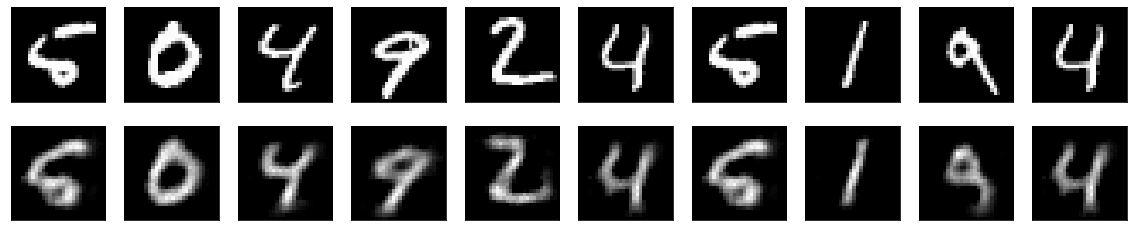

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
display(X_test[:10],autoencoder(X_test[:10]).numpy())